In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("temp.csv")

df.isna()

,t,x,y,z,vx,vy,vz,u
0,False,False,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True
3,False,False,True,True,True,True,True,True
4,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
3199995,False,False,True,True,True,True,True,True
3199996,False,False,True,True,True,True,True,True
3199997,False,False,True,True,True,True,True,True
3199998,False,False,True,True,True,True,True,True


In [275]:
df['r'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
df['v'] = np.sqrt(df['vx']**2 + df['vy']**2 + df['vz']**2)
df['r2'] = df['x']**2 + df['y']**2 + df['z']**2
df['v2'] = df['vx']**2 + df['vy']**2 + df['vz']**2

df.head()

,t,x,y,z,vx,vy,vz,u,r,v,r2,v2
0,0.0,0.003354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.003354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.003354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.003354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.003354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
df_bytimestep = df.groupby('t')[['v2']].sum()
df_bytimestep['T'] = df_bytimestep['v2']/(3*64)
df_bytimestep.head()


,v2,T
t,,
0.000,0.0,0.0
0.001,0.0,0.0
0.002,0.0,0.0
0.003,0.0,0.0
0.004,0.0,0.0


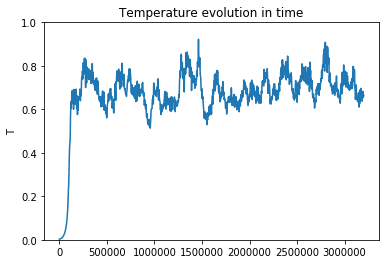

In [278]:
%matplotlib inline

df_bytimestep['T'].plot()
plt.title("Temperature evolution in time")
plt.ylim(0,1)
plt.ylabel("T");